# ChEMBL data preparation

Fetching and inspecting ChEMBL compound data that will be used throughout the project.

## Imports

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  #set this to False if you want PNGs instead of SVGs

from chembl_webresource_client.new_client import new_client

RDKit WARNING: [19:21:56] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

## Functions

In [52]:
def plot_bar(df, col):
    df_counts = df[col].value_counts()
    _ = plt.bar(df_counts.index, df_counts.values)
    plt.xlabel(col)
    plt.ylabel("Molecule counts")
    plt.show()

def draw_sample(mols, size=16, replace=False, imgSize=250):
    """draws a sample of molecules from the input array of SMILES"""
    m_sample = [Chem.MolFromSmiles(m) for m in np.random.choice(mols, size=size, replace=replace)]
    return Draw.MolsToGridImage(m_sample, molsPerRow=4, subImgSize=(imgSize, imgSize))


## Tests using the ChEMBL python client

Good for querying and searching ChEMBL programmatically. Not fast to download all data.

In [2]:
molecule = new_client.molecule
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

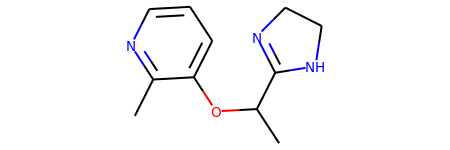

In [9]:
# load and visualize an example compound
mol_smi = light_molecules[53589]["molecule_structures"]["canonical_smiles"]
mol = Chem.MolFromSmiles(mol_smi)
mol

In [10]:
# check that SMILES come in a canonical format
mol_smi

'Cc1ncccc1OC(C)C1=NCCN1'

In [11]:
Chem.CanonSmiles(mol_smi)

'Cc1ncccc1OC(C)C1=NCCN1'

## Load all ChEMBL compounds

All ChEMBL compunds have been downloaded and stored in a .zip file.

In [23]:
molecules = pd.read_csv("data/chembl_compunds.zip", compression="zip", sep=";", na_values="None")
molecules.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX ApKa,CX BpKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
0,CHEMBL3927695,NaN,NaN,Small molecule,0.0,745.28,1.0,1.0,7.46,96.71,8.0,1.0,2.0,7.0,N,0.18,9.25,6.51,7.00,6.94,5.0,MOL,-1.0,54.0,10.0,1.0,2.0,744.2715,NEUTRAL,C43H41ClN4O6,O=C(c1cc(-c2cc3c(cc2C(=O)N2Cc4ccccc4C[C@H]2CN2...
1,CHEMBL3943498,NaN,NaN,Small molecule,0.0,739.71,1.0,1.0,6.39,107.78,6.0,0.0,2.0,8.0,N,0.20,NaN,NaN,5.32,5.32,3.0,MOL,-1.0,51.0,8.0,0.0,2.0,739.1951,NEUTRAL,C35H32F7N3O5S,CC(=O)N1CCC(C(=O)N2CC[C@](c3ccc(C(OCc4ccccc4C#...
2,CHEMBL2333117,NaN,NaN,Small molecule,0.0,310.36,1.0,2.0,1.95,98.72,6.0,2.0,0.0,4.0,N,0.77,13.94,4.19,1.36,1.36,3.0,MOL,-1.0,23.0,7.0,3.0,0.0,310.1542,NEUTRAL,C16H18N6O,CC(C)Nc1c(C(N)=O)nnc2ccc(-c3cnn(C)c3)cc12
3,CHEMBL1189585,NaN,NaN,Small molecule,0.0,261.35,NaN,NaN,1.95,44.70,4.0,1.0,0.0,0.0,N,0.78,10.98,3.49,2.84,2.84,1.0,MOL,-1.0,18.0,4.0,1.0,0.0,261.0936,NEUTRAL,C13H15N3OS,CC1C(=O)NC2=Nc3sc4c(c3CN21)CCCC4
4,CHEMBL3927702,NaN,NaN,Small molecule,0.0,2461.90,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOL,-1.0,NaN,NaN,NaN,NaN,2460.3430,NaN,C118H177N31O27,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCC(N)=O)...


### Display an example molecule

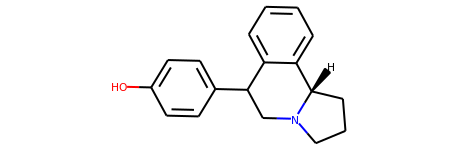

In [24]:
Chem.MolFromSmiles(molecules.loc[23, "Smiles"])

## EDA

Inspect and clean the full dataset. The goal is to end up with a *representative set* of drug-like molecules that fall within certain bounds in order to be useful for drug discovery projects.

In [25]:
molecules.describe()

,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,QED Weighted,CX ApKa,CX BpKa,CX LogP,CX LogD,Aromatic Rings,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic)
count,1.961457e+06,1.944921e+06,1.865149e+06,1.865149e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.093503e+06,1.208215e+06,1.895245e+06,1.895245e+06,1.895465e+06,1.961457e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.944908e+06
mean,1.287206e-02,4.334191e+02,5.836754e+00,8.613782e+00,3.486932e+00,8.227064e+01,5.253101e+00,1.608337e+00,4.133149e-01,5.794883e+00,5.452706e-01,9.139420e+00,5.590716e+00,3.146201e+00,2.490231e+00,2.463846e+00,-9.913625e-01,2.848047e+01,6.294962e+00,1.769215e+00,4.633433e-01,4.289850e+02
std,2.078291e-01,2.551495e+02,1.374638e+01,4.533009e+01,1.905032e+00,4.414831e+01,2.414166e+00,1.567488e+00,7.241692e-01,3.809391e+00,2.200944e-01,3.745391e+00,3.203295e+00,2.170068e+00,2.523409e+00,1.230736e+00,9.358210e-02,8.857930e+00,2.896990e+00,1.821456e+00,8.002276e-01,2.535953e+02
min,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,-1.426000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,-1.961000e+01,0.000000e+00,-2.095000e+01,-2.999000e+01,0.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.002600e+00
25%,0.000000e+00,3.264300e+02,1.000000e+00,2.000000e+00,2.370000e+00,5.456000e+01,4.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,3.800000e-01,6.730000e+00,2.800000e+00,1.970000e+00,1.270000e+00,2.000000e+00,-1.000000e+00,2.300000e+01,4.000000e+00,1.000000e+00,0.000000e+00,3.240102e+02
50%,0.000000e+00,3.953000e+02,3.000000e+00,4.000000e+00,3.470000e+00,7.560000e+01,5.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,5.600000e-01,9.940000e+00,5.580000e+00,3.210000e+00,2.710000e+00,2.000000e+00,-1.000000e+00,2.700000e+01,6.000000e+00,1.000000e+00,0.000000e+00,3.911522e+02
75%,0.000000e+00,4.759300e+02,5.000000e+00,8.000000e+00,4.610000e+00,1.003300e+02,6.000000e+00,2.000000e+00,1.000000e+00,7.000000e+00,7.300000e-01,1.227000e+01,8.400000e+00,4.440000e+00,4.000000e+00,3.000000e+00,-1.000000e+00,3.300000e+01,8.000000e+00,2.000000e+00,1.000000e+00,4.712270e+02
max,4.000000e+00,1.302049e+04,1.292000e+03,1.649500e+04,2.257000e+01,5.952200e+02,3.200000e+01,2.500000e+01,4.000000e+00,6.700000e+01,9.500000e-01,1.400000e+01,6.190000e+01,2.488000e+01,2.299000e+01,3.000000e+01,1.000000e+00,7.900000e+01,3.500000e+01,3.200000e+01,4.000000e+00,1.301203e+04


### Filter missing data

Only intrested in compunds with available SMILES strings.

In [26]:
molecules.dropna(subset=["Smiles"], inplace=True)

In [27]:
len(molecules)

1941405

### Filter *out-of-bounds* data

#### Molecular Weight

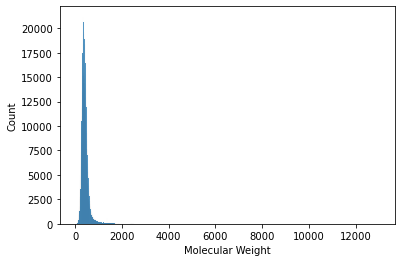

In [28]:
MW = "Molecular Weight"
_ = sns.histplot(data=molecules, x=MW)

In [29]:
# filter too large molecules
molecules = molecules.query("`{}` < 1000".format(MW))
len(molecules)

1905358

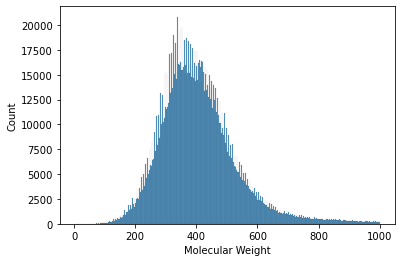

In [30]:
_ = sns.histplot(data=molecules, x=MW)

#### Number of heavy atoms

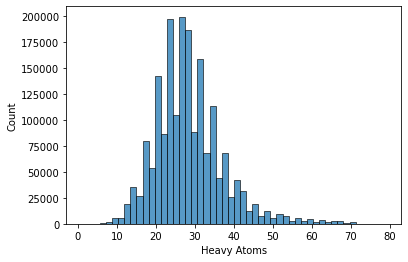

In [31]:
NHA = "Heavy Atoms"
_ = sns.histplot(data=molecules, x=NHA, bins=50)

In [32]:
# filter molecules with too many heavy atoms
molecules = molecules.query("`{}` < 52".format(NHA))
len(molecules)

1851669

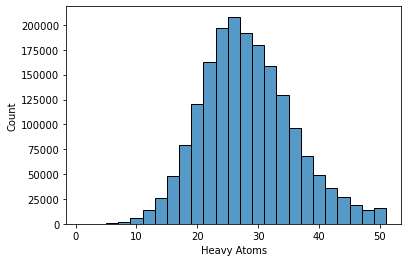

In [35]:
_ = sns.histplot(data=molecules, x=NHA, binwidth=2)

#### RO5 violations

Molecules that violate several of the Lipiniski's rule of 5 are unlikely to be good drugs and need to be filtered.

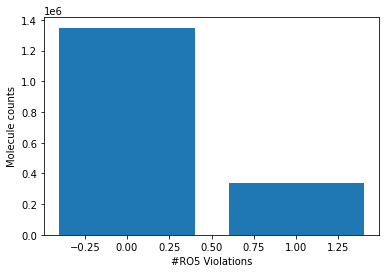

In [53]:
RO5V = "#RO5 Violations"
plot_bar(molecules, RO5V)

In [50]:
# I will allow only molecules that violate up to 1 rule.
molecules = molecules[molecules[RO5V] < 2]
len(molecules)

1685770

### Categorical counts/category removal

In [55]:
molecules.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX ApKa,CX BpKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
2,CHEMBL2333117,NaN,NaN,Small molecule,0.0,310.36,1.0,2.0,1.95,98.72,6.0,2.0,0.0,4.0,N,0.77,13.94,4.19,1.36,1.36,3.0,MOL,-1.0,23.0,7.0,3.0,0.0,310.1542,NEUTRAL,C16H18N6O,CC(C)Nc1c(C(N)=O)nnc2ccc(-c3cnn(C)c3)cc12
3,CHEMBL1189585,NaN,NaN,Small molecule,0.0,261.35,NaN,NaN,1.95,44.70,4.0,1.0,0.0,0.0,N,0.78,10.98,3.49,2.84,2.84,1.0,MOL,-1.0,18.0,4.0,1.0,0.0,261.0936,NEUTRAL,C13H15N3OS,CC1C(=O)NC2=Nc3sc4c(c3CN21)CCCC4
5,CHEMBL4089494,NaN,NaN,Small molecule,0.0,483.53,7.0,10.0,3.53,121.37,7.0,3.0,0.0,5.0,N,0.40,11.16,3.48,3.83,3.83,4.0,MOL,-1.0,36.0,10.0,3.0,0.0,483.2019,NEUTRAL,C26H25N7O3,CNC(=O)c1ccc(NC(=O)Nc2ccc(-c3nc(N4CCOCC4)c4ncc...
7,CHEMBL1189590,NaN,NaN,Small molecule,0.0,271.30,NaN,NaN,2.08,46.84,5.0,0.0,0.0,3.0,N,0.73,NaN,4.16,2.78,2.78,3.0,MOL,-1.0,20.0,5.0,0.0,0.0,271.1233,NEUTRAL,C14H14FN5,CN(C)c1nccc2c1nnn2Cc1ccccc1F
8,CHEMBL3927722,NaN,NaN,Small molecule,0.0,300.32,1.0,1.0,2.31,86.09,6.0,1.0,0.0,5.0,N,0.78,12.15,1.71,0.95,0.95,3.0,MOL,-1.0,22.0,7.0,1.0,0.0,300.1222,NEUTRAL,C15H16N4O3,Cc1noc(C)c1Cn1cc(NC(=O)Cc2ccco2)cn1


#### Mol. species

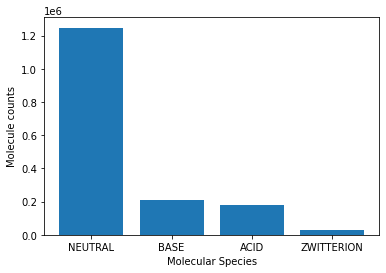

In [54]:
plot_bar(molecules, "Molecular Species")

#### Structure type

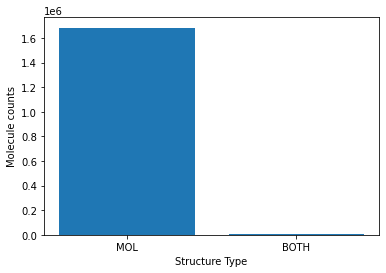

In [56]:
plot_bar(molecules, "Structure Type")

In [65]:
# examine the BOTH structure type
both_struct = molecules.query("`Structure Type` == 'BOTH'").reset_index(drop=True)
len(both_struct)

2779

In [66]:
both_struct.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX ApKa,CX BpKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
0,CHEMBL3348886,NaN,NaN,Protein,0.0,405.42,1.0,6.0,-2.15,170.59,6.0,4.0,0.0,6.0,N,0.42,11.32,6.74,-3.68,-3.74,1.0,BOTH,-1.0,29.0,12.0,5.0,1.0,405.1761,NEUTRAL,C17H23N7O5,CN1C(=O)C[C@H](C(=O)N[C@@H](Cc2cnc[nH]2)C(=O)N...
1,CHEMBL1243398,NaN,NaN,Protein,0.0,585.79,1.0,1.0,2.46,145.50,5.0,5.0,1.0,9.0,N,0.30,10.71,NaN,3.62,3.62,1.0,BOTH,-1.0,42.0,10.0,5.0,1.0,585.3890,NEUTRAL,C32H51N5O5,CC(C)C[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(...
2,CHEMBL2112656,NaN,NaN,Protein,0.0,698.87,3.0,3.0,2.06,139.44,6.0,2.0,1.0,4.0,N,0.50,10.89,NaN,2.02,2.02,2.0,BOTH,-1.0,51.0,12.0,2.0,2.0,698.3792,NEUTRAL,C39H50N6O6,C[C@@H]1NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@@H]2CC...
3,CHEMBL454203,NaN,NaN,Protein,0.0,709.93,1.0,1.0,0.34,188.77,8.0,4.0,1.0,7.0,N,0.29,11.77,NaN,0.35,0.35,0.0,BOTH,-1.0,50.0,15.0,4.0,2.0,709.4738,NEUTRAL,C35H63N7O8,CC[C@H](C)[C@H]1NC(=O)[C@@H]([C@@H](C)O)NC(=O)...
4,CHEMBL584399,NaN,NaN,Protein,0.0,585.79,2.0,2.0,2.46,145.50,5.0,5.0,1.0,9.0,N,0.30,10.70,NaN,3.62,3.62,1.0,BOTH,-1.0,42.0,10.0,5.0,1.0,585.3890,NEUTRAL,C32H51N5O5,CC(C)C[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](C...


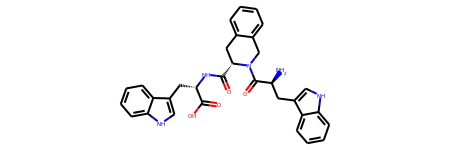

In [71]:
# draw an example
Chem.MolFromSmiles(both_struct.loc[66, "Smiles"])

#### Type

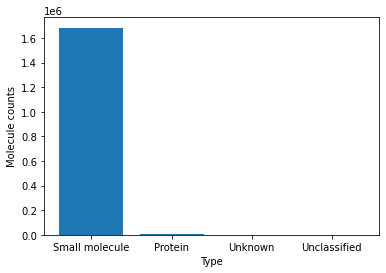

In [72]:
plot_bar(molecules, "Type")

In [87]:
# keep only small molecules in the dataset
molecules = molecules.query("`Type` == 'Small molecule'")
len(molecules)

1682888

#### Inorganic flag

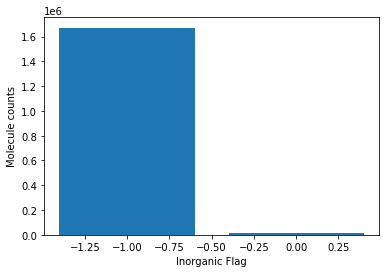

In [88]:
plot_bar(molecules, "Inorganic Flag")

In [89]:
# examine inorganic molecules
inorganic = molecules.query("`Inorganic Flag` == 0").reset_index(drop=True)
len(inorganic)

11185

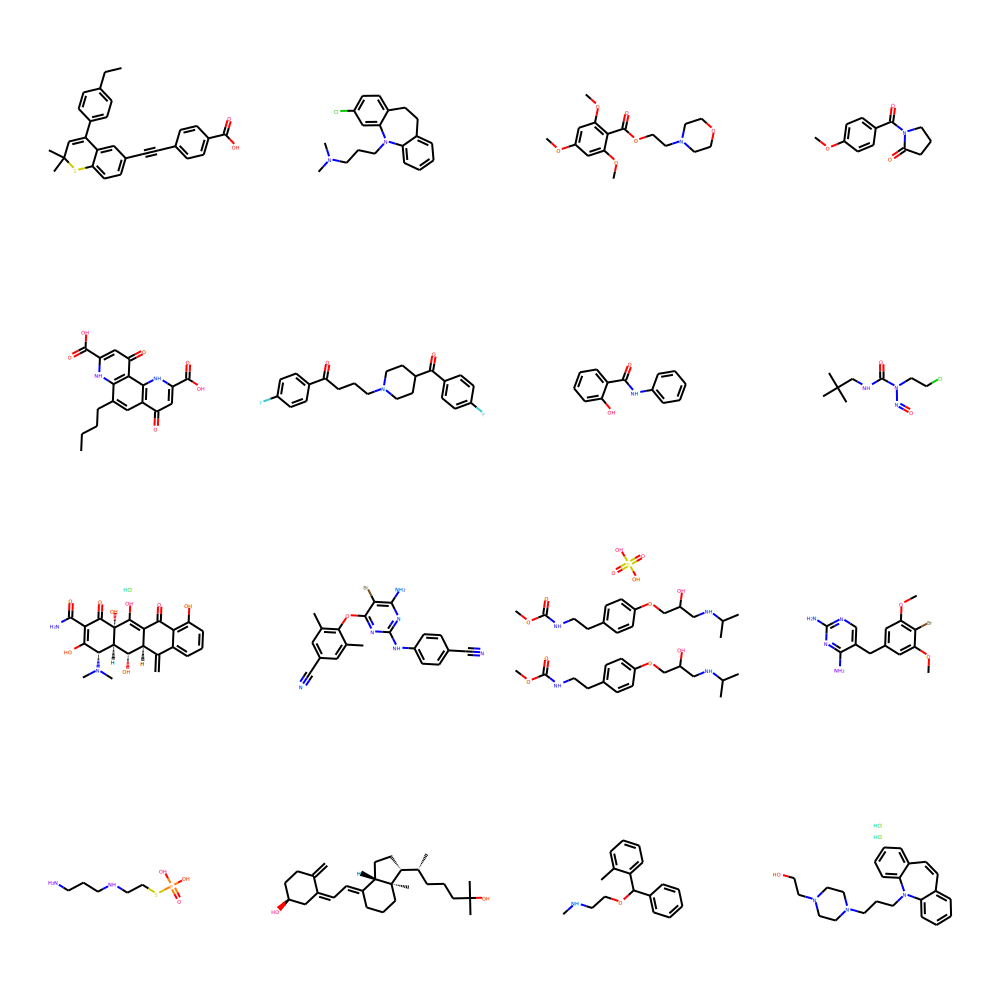

In [114]:
# draw some examples
draw_sample(inorganic["Smiles"], size=16)

In [91]:
inorganic.loc[0, "Smiles"]

'CCC(=O)N(c1ccc(Cl)c(Cl)c1)C1CCCC1N(C)C.O=C(O)/C=C\\C(=O)O'

### Smiles inspection

Since SMILES will be used as input format for the variational autoencoder (VAE), here I examine some properties of the SMILES strings in the dataset.

#### Ionic bonds

In [99]:
# Non-covalent bonds are represented with a '.'. Check if there are any molecules with non-covalent bonds
ionic = molecules[molecules["Smiles"].str.contains(".", regex=False)].reset_index(drop=True)
len(ionic)

86526

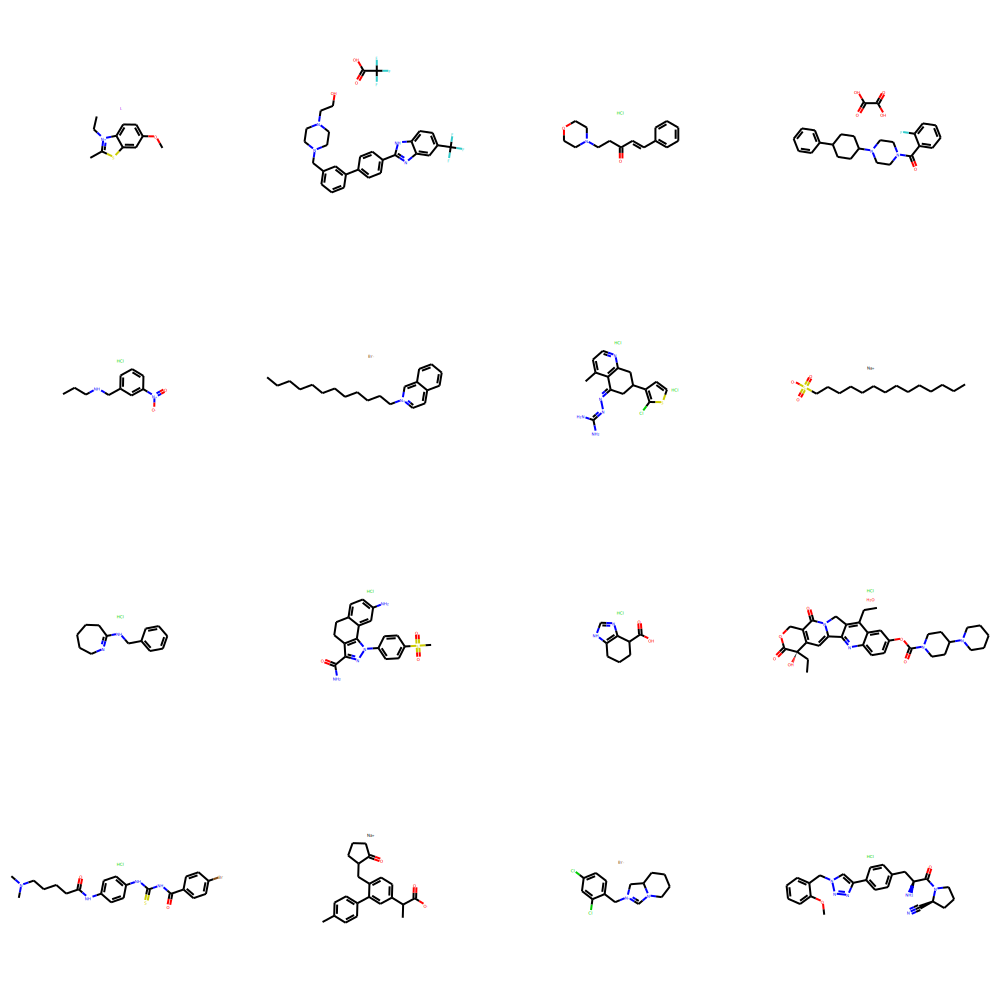

In [113]:
draw_sample(ionic["Smiles"], size=16)

In [120]:
# ionic compounds should be removed from the dataset (models should generate only covalent molecules)
cov_molecules = molecules[~molecules["Smiles"].str.contains(".", regex=False)].reset_index(drop=True)
len(cov_molecules)

1596362

#### Smiles length

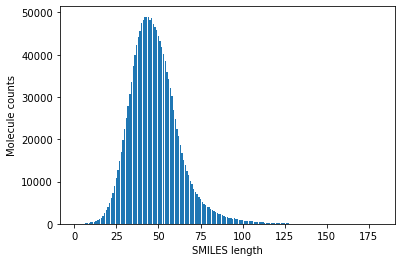

In [118]:
plot_bar(cov_molecules["Smiles"].str.len().to_frame("SMILES length"), "SMILES length")

In [125]:
# remove compounds with very long SMILES (quite rare anyway)
cov_molecules = cov_molecules[cov_molecules["Smiles"].str.len() <= 130]
len(cov_molecules)

1595673

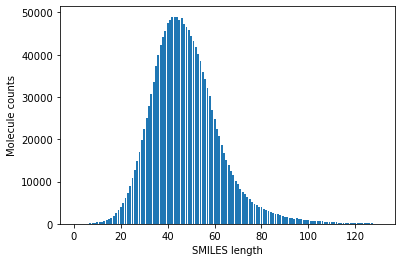

In [126]:
plot_bar(cov_molecules["Smiles"].str.len().to_frame("SMILES length"), "SMILES length")

## Prediction targets

I will use `AlogP` and `QED Weighted` as prediction targets from the latent space of the VAE. Therefore those values should be present for all compounds in the dataset

In [130]:
cov_molecules[["AlogP", "QED Weighted"]].isna().astype(int).sum()

AlogP           0
QED Weighted    0
dtype: int64

All prediction targets are present in the dataset.

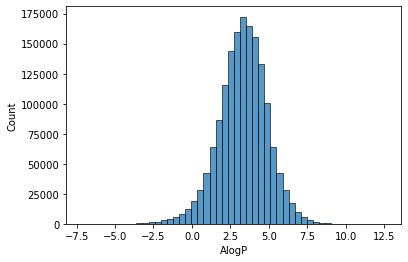

In [133]:
_ = sns.histplot(data=cov_molecules, x="AlogP", bins=50)

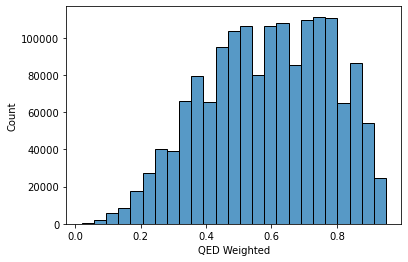

In [135]:
_ = sns.histplot(data=cov_molecules, x="QED Weighted", bins=25)

## Final dataset

### Sample molecules

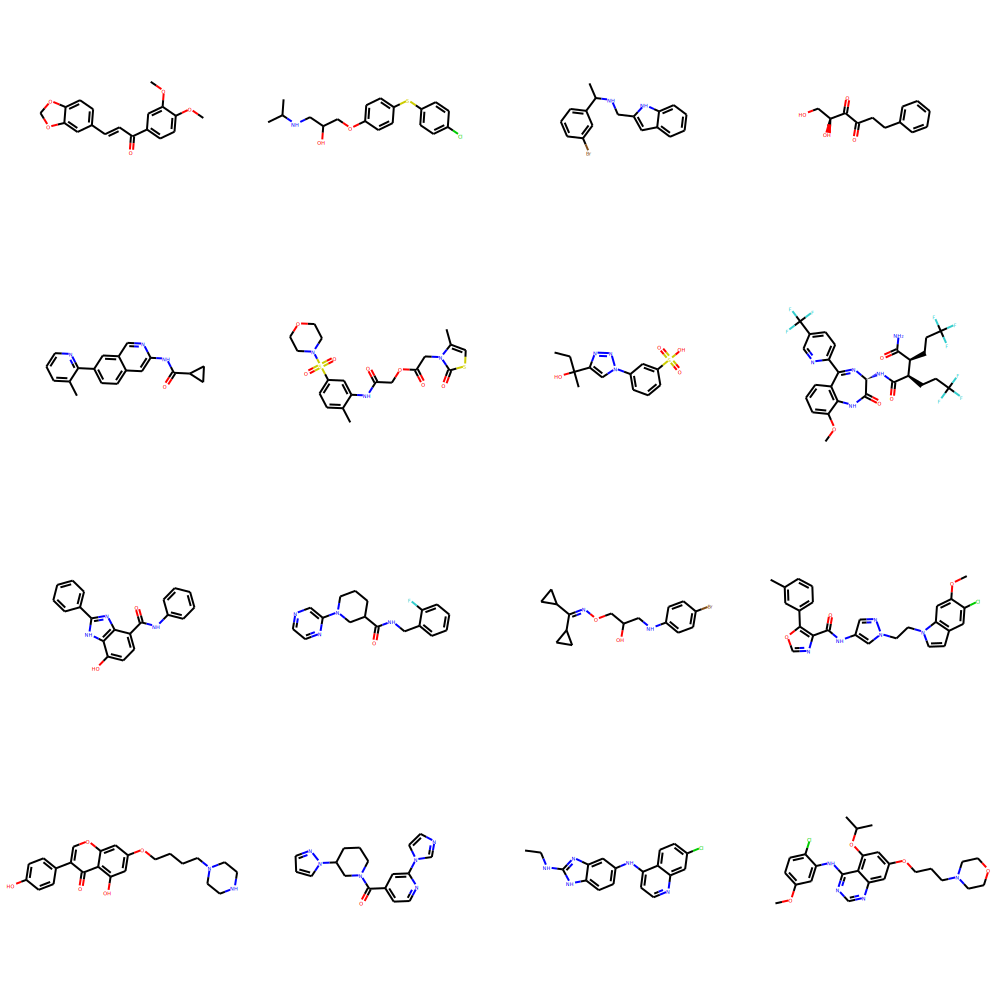

In [136]:
draw_sample(cov_molecules["Smiles"], size=16)

### Persist cleaned dataset

In [138]:
final = cov_molecules.set_index("ChEMBL ID")[["Smiles", "AlogP", "QED Weighted"]]
final.head()

,Smiles,AlogP,QED Weighted
ChEMBL ID,,,
CHEMBL2333117,CC(C)Nc1c(C(N)=O)nnc2ccc(-c3cnn(C)c3)cc12,1.95,0.77
CHEMBL1189585,CC1C(=O)NC2=Nc3sc4c(c3CN21)CCCC4,1.95,0.78
CHEMBL4089494,CNC(=O)c1ccc(NC(=O)Nc2ccc(-c3nc(N4CCOCC4)c4ncc...,3.53,0.40
CHEMBL1189590,CN(C)c1nccc2c1nnn2Cc1ccccc1F,2.08,0.73
CHEMBL3927722,Cc1noc(C)c1Cn1cc(NC(=O)Cc2ccco2)cn1,2.31,0.78


In [141]:
final.to_csv("data/cleaned_dataset.csv")